In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../data/processed/cleaned_googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Drop rows with missing target
df = df.dropna(subset=['Rating'])

# Select input features
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
X = df[features]

# Target variable
y = df['Rating']

In [ ]:
le = LabelEncoder()

X['Category'] = le.fit_transform(X['Category'])
X['Content Rating'] = le.fit_transform(X['Content Rating'])
X['Type'] = le.fit_transform(X['Type'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the cleaned dataframe
df = pd.read_csv('../data/processed/cleaned_googleplaystore.csv')

# ========== DATA CLEANING FOR MODELING ==========

# Remove rows with missing target values
df = df.dropna(subset=['Rating'])

# Clean 'Size' column
def clean_size(size):
    if pd.isnull(size) or size == 'Varies with device':
        return np.nan
    size = size.replace('M', '').replace('k', '')
    multiplier = 1_000_000 if 'M' in size else 1_000 if 'k' in size else 1
    try:
        return float(size) * multiplier
    except:
        return np.nan

df['Size'] = df['Size'].astype(str).apply(clean_size)

# Clean 'Installs' column
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)

# Clean 'Price' column
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing values in predictors
df_model = df.dropna(subset=['Size', 'Installs', 'Price'])

# ========== MODELING ==========

# Select features and target
X = df_model[['Size', 'Installs', 'Price']]
y = df_model['Rating']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Model training completed successfully.")


Model training completed successfully.


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.3014239777471925
R2 Score: 0.0009739681330278582


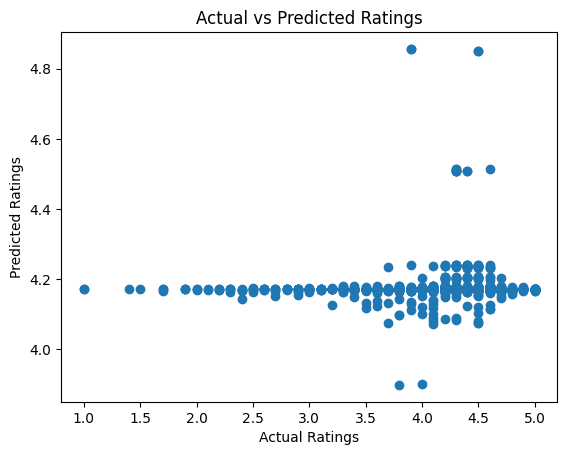

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.savefig('../output/figures/actual_vs_predicted_ratings.png')
plt.show()
